# Лабораторная работа 5

# 1. Установка библиотек

In [1]:
!pip install tensorflow scikit-learn matplotlib kaggle

  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 23.2 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.5 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 18.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.4 MB/s  0:00:00 eta 0:00:01
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 25.3 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 28.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37/37 [tensorflow]7 [tensorflow]]ts]


# 2. Импорты

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score

# З. Загрузка датасета с Kaggle

In [4]:
!pip install kaggle --quiet

In [5]:
import json
import os

kaggle_api = {
    "username": "KGAT",
    "key": "KGAT_cf55ed4df1691f0e7760c60a02bac644"
}

# Создаём папку .kaggle
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Записываем kaggle.json
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_api, f)

# Делаем файл защищённым
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [8]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
100%|████████████████████████████████████████| 307M/307M [00:14<00:00, 23.9MB/s]
100%|████████████████████████████████████████| 307M/307M [00:14<00:00, 21.5MB/s]


In [13]:
import os
import json
from zipfile import ZipFile

# 1️⃣ Создаём kaggle.json
kaggle_api = {
    "username": "KGAT",
    "key": "cf55ed4df1691f0e7760c60a02bac644"
}

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_api, f)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# 2️⃣ Устанавливаем kaggle
!pip install kaggle --quiet

# 3️⃣ Скачиваем датасет в текущую папку
dataset_name = "sanikamal/horses-or-humans-dataset"
zip_file = "horses-or-humans-dataset.zip"

!kaggle datasets download -d {dataset_name} -p . --force

# 4️⃣ Проверяем, что zip-файл есть
if os.path.exists(zip_file):
    print(f"{zip_file} скачан успешно ✅")
else:
    print(f"{zip_file} не найден ❌")
    
# 5️⃣ Распаковываем zip
if os.path.exists(zip_file):
    with ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Распаковка завершена ✅")
    
# 6️⃣ Проверяем содержимое распакованной папки
extracted_dir = zip_file.replace(".zip","")  # обычно так распаковывается
if os.path.exists(extracted_dir):
    print("Содержимое распакованной папки:", os.listdir(extracted_dir))
else:
    print(f"Папка {extracted_dir} не найдена ❌")

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
100%|████████████████████████████████████████| 307M/307M [00:14<00:00, 19.2MB/s]
100%|████████████████████████████████████████| 307M/307M [00:14<00:00, 21.5MB/s]
horses-or-humans-dataset.zip скачан успешно ✅
Распаковка завершена ✅
Папка horses-or-humans-dataset не найдена ❌


In [14]:
from zipfile import ZipFile

zip_file = "horses-or-humans-dataset.zip"

with ZipFile(zip_file, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()  # список всех файлов в zip
    print("Первые 20 файлов/папок в zip:")
    print(zip_contents[:20])

Первые 20 файлов/папок в zip:
['horse-or-human/horse-or-human/train/horses/horse01-0.png', 'horse-or-human/horse-or-human/train/horses/horse01-1.png', 'horse-or-human/horse-or-human/train/horses/horse01-2.png', 'horse-or-human/horse-or-human/train/horses/horse01-3.png', 'horse-or-human/horse-or-human/train/horses/horse01-4.png', 'horse-or-human/horse-or-human/train/horses/horse01-5.png', 'horse-or-human/horse-or-human/train/horses/horse01-6.png', 'horse-or-human/horse-or-human/train/horses/horse01-7.png', 'horse-or-human/horse-or-human/train/horses/horse01-8.png', 'horse-or-human/horse-or-human/train/horses/horse01-9.png', 'horse-or-human/horse-or-human/train/horses/horse02-0.png', 'horse-or-human/horse-or-human/train/horses/horse02-1.png', 'horse-or-human/horse-or-human/train/horses/horse02-2.png', 'horse-or-human/horse-or-human/train/horses/horse02-3.png', 'horse-or-human/horse-or-human/train/horses/horse02-4.png', 'horse-or-human/horse-or-human/train/horses/horse02-5.png', 'horse-or

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Путь к распакованным данным
base_dir = "horse-or-human/horse-or-human"

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "validation")

# Аугментация для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Только рескейл для валидации
val_datagen = ImageDataGenerator(rescale=1./255)

# Генератор для обучения
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Генератор для валидации
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# 4. Пути к данным

In [17]:
train_dir = "horse-or-human/train"
test_dir = "horse-or-human/validation"

# 5. Аугментация данных

In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# 6. Генераторы данных

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# 7. Создание CNN

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(150,150,3)),      # ✅ Первый слой Input
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 8. Компиляция модели

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Обучение модели

In [23]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.6777 - loss: 2.5890 - val_accuracy: 0.5781 - val_loss: 1.3021
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.9279 - loss: 0.1856 - val_accuracy: 0.6758 - val_loss: 1.4162
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.9562 - loss: 0.1302 - val_accuracy: 0.7695 - val_loss: 1.0421
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 481ms/step - accuracy: 0.9718 - loss: 0.0988 - val_accuracy: 0.7109 - val_loss: 1.4385
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.9844 - loss: 0.0695 - val_accuracy: 0.6953 - val_loss: 1.7364
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.9844 - loss: 0.0647 - val_accuracy: 0.8320 - val_loss: 0.9728
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.9883 - loss: 0.0426 - val_accuracy: 0.7227 - val_loss: 1.6984
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.9747 - loss: 0.0710 - val_accura

# 9. График Loss

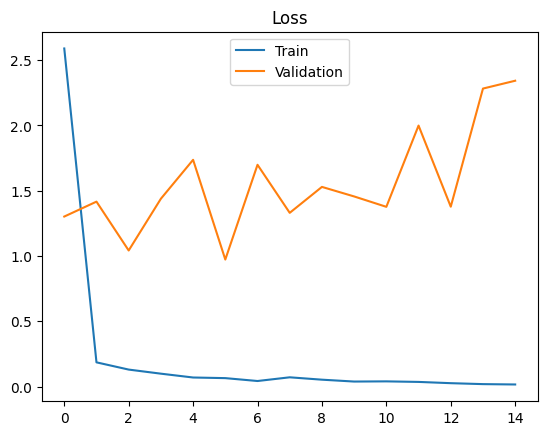

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")
plt.show()

# 10. ROC-AUC

In [25]:
preds = model.predict(test_generator)
y_true = test_generator.classes

roc_auc = roc_auc_score(y_true, preds)
print("ROC-AUC:", roc_auc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
ROC-AUC: 0.962677001953125


# 11. Интерфейс

In [26]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 16.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 861.5/861.5 kB 25.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22/22 [gradio]21/22 [gradio]c]core]


In [28]:
!pip install gradio pytz --quiet

In [29]:
import gradio as gr

In [1]:
# 🔹 Gradio интерфейс
image_input = gr.Image(type="pil", label="Загрузите изображение")
text_output = gr.Textbox(label="Результат")

interface = gr.Interface(
    fn=predict_image,
    inputs=image_input,
    outputs=text_output,
    title="Классификация: Человек или Лошадь",
    description="Загрузите фото, чтобы узнать — человек или лошадь на изображении."
)

interface.launch()

NameError: name 'gr' is not defined